# Simulate PSF of proposed system

Randomly generated a mask for the LCD component and simulate its PSF.

In [1]:
from lenslessclass.models import SLMMultiClassLogistic
from waveprop.devices import slm_dict, sensor_dict, SensorParam
import cv2
import numpy as np
from lensless.util import print_image_info
import time
from datetime import datetime


down_out = 1
sensor = "rpi_hq"
slm = "adafruit"
crop_fact = 0.8
device = "cpu"
device_mask_creation = "cpu"
deadspace = True
scene2mask = 0.4
mask2sensor = 0.004


timestamp = datetime.now().strftime("%d%m%Y_%Hh%M")

sensor_param = sensor_dict[sensor]
sensor_size = sensor_param[SensorParam.SHAPE]
if down_out > 1:
    sensor_size = (sensor_size * 1 / down_out).astype(int)

start_time = time.time()
model = SLMMultiClassLogistic(
    input_shape=sensor_size,
    slm_config=slm_dict[slm],
    sensor_config=sensor_param,
    crop_fact=crop_fact,
    device=device,
    deadspace=deadspace,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    device_mask_creation=device_mask_creation,
    n_class=10,   # doesnt matter, just need PSF in the end
    grayscale=False,
    requires_grad=False,
)
print("Computation time [m] : ", (time.time() - start_time) / 60.0)


Computation time [m] :  0.20368914206822714


In [13]:
psf_sim = model._psf.numpy()
psf_sim = np.transpose(psf_sim, (1, 2, 0))
print("PSF dimensions : ", psf_sim.shape)
print("SLM dimensions : ", model.slm_vals.shape)
print("Number of SLM pixels : ", np.prod(model.slm_vals.shape))


PSF dimensions :  (3040, 4056, 3)
SLM dimensions :  torch.Size([51, 22])
Number of SLM pixels :  1122


# view

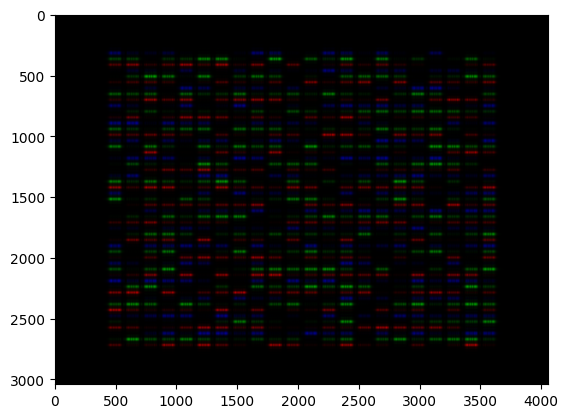

In [15]:
from lensless.plot import plot_image


plot_image(psf_sim, normalize=True);

# save

as viewable 8 bit

In [18]:
bit_depth = 8
out_dtype = dtype=np.uint8

psf_quant = psf_sim / psf_sim.max()
psf_quant *= 2**bit_depth - 1
psf_quant = psf_quant.astype(dtype=out_dtype)
print_image_info(psf_quant)

fp = f"simulated_adafruit_deadspace{deadspace}_{timestamp}_{bit_depth}bit.png"
cv2.imwrite(fp, cv2.cvtColor(psf_quant, cv2.COLOR_RGB2BGR))
print("Saved simulated PSF to : ", fp)

dimensions : (3040, 4056, 3)
data type : uint8
max  : 255
min  : 0
mean : 3.9151556120021453
Saved simulated PSF to :  simulated_adafruit_deadspaceTrue_17112022_09h40_8bit.png


as 12 bit as on Raspberry Pi sensor

In [19]:
bit_depth = 12
out_dtype = dtype=np.uint16

# cast to uint16 as on sensor
psf_quant = psf_sim / psf_sim.max()
psf_quant *= 2**bit_depth - 1
psf_quant = psf_quant.astype(out_dtype)
print_image_info(psf_quant)

fp = f"simulated_adafruit_deadspace{deadspace}_{timestamp}.png"
cv2.imwrite(fp, cv2.cvtColor(psf_quant, cv2.COLOR_RGB2BGR))
print("Saved simulated PSF to : ", fp)

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 66.87412367209939
Saved simulated PSF to :  simulated_adafruit_deadspaceTrue_17112022_09h40.png
